# Camera test

In [ ]:
from camera.camera import Camera, CameraType
import matplotlib.pyplot as plt

In [ ]:
cam1 = Camera(cam_ip='./assets/entrance_1.mp4', cam_type=CameraType.entrance, num_votes=8)
cam2 = Camera(cam_ip='./assets/entrance_1.mp4', cam_type=CameraType.entrance, num_votes=8)

In [ ]:
cam1.start()
cam2.start()

In [ ]:
plt.imshow(cam1.get_new_frame())

In [ ]:
plt.imshow(cam2.get_new_frame())

In [ ]:
cam1.start_accumulate()
accum_frames = cam1.get_accumulated_frames()

In [ ]:
accum_frames = cam1.get_accumulated_frames()

In [ ]:
plt.imshow(accum_frames[0])

In [ ]:
cam1.stop()

In [ ]:
cam2.stop()

In [ ]:
cam1.is_accum_starting

In [ ]:
accum_frames.shape

# Manager test

In [ ]:
from camera.manager import CameraManager
import matplotlib.pyplot as plt
import yaml

In [ ]:
with open('./config/cameras.yaml', 'r') as f:
    config = yaml.load(f)
config

In [ ]:
manager = CameraManager(config)

In [ ]:
manager.start_cameras_streaming()

In [ ]:
plt.imshow(manager.get_all_frames()['./assets/entrance_1.mp4']['new_frame'])

In [ ]:
manager.cameras['./assets/entrance_1.mp4']['camera'].start_accumulate()

In [ ]:
%%time
get = manager.get_all_frames()['./assets/entrance_1.mp4']['accum_frames']

In [ ]:
plt.imshow(get[0])

# Polygon

In [1]:
import cv2
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import numpy as np

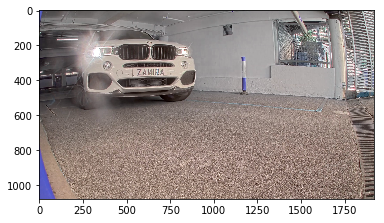

In [17]:
img = cv2.imread('./assets/test.jpg')
plt.imshow(img)

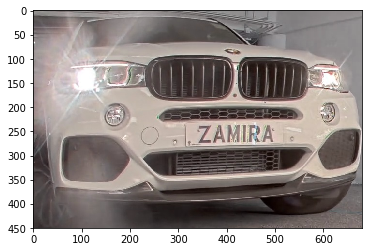

In [18]:
x1 = 220
y1 = 100
x2 = 900
y2 = 550
plt.imshow(img[y1:y2, x1:x2])

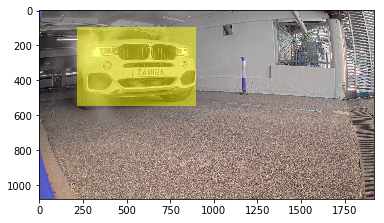

In [19]:
alpha = 0.5 # that's your transparency factor

car_box = box(x1, y1, x2, y2)
int_coords = lambda x: np.array(x).round().astype(np.int32)
exterior = [int_coords(car_box.exterior.coords)]

overlay = img.copy()
cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)
plt.imshow(img)

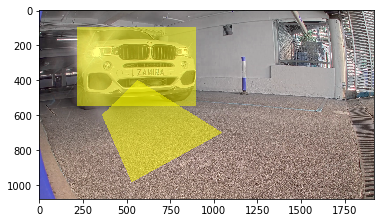

In [20]:
p1 = [531, 983]
p2 = [1050, 700]
p3 = [565, 400]
p4 = [360, 600]
alpha = 0.5 # that's your transparency factor

trigger_zone = Polygon([p1, p2, p3, p4])
int_coords = lambda x: np.array(x).round().astype(np.int32)
exterior = [int_coords(trigger_zone.exterior.coords)]

overlay = img.copy()
cv2.fillPoly(overlay, exterior, color=(255, 255, 0))
cv2.addWeighted(overlay, alpha, img, 1 - alpha, 0, img)
plt.imshow(img)

In [33]:
def cal_car_zone_iou(trigger_zone, car_coords):
    """Calculate the iou between car coords and trigger zone
    Args:
        trigger_zone (shapely.geometry.Polygon): Polygon
        car_coords (tuple): (x1, y1, x2, y2)
    Returns:
        iou(float)
    """
    car_box = box(*car_coords)  # shapely.geometry.box(minx, miny, maxx, maxy, ccw=True) 
    iou = trigger_zone.intersection(car_box).area / trigger_zone.union(car_box).area
    return iou

def cal_car_car_iou(first_car_coords, second_car_coords):
    """Calculate the iou between two car coords
    Args:
        first_car_coords (tuple): (x1, y1, x2, y2)
        second_car_coords (tuple): (x1, y1, x2, y2)
    Returns:
        iou(float)
    """
    car_box_1 = box(*first_car_coords)
    car_box_2 = box(*second_car_coords)
    iou = car_box_1.intersection(car_box_2).area / car_box_1.union(car_box_2).area
    return iou

def compute_iou(bbox1, bbox2):
    '''
    bbox1: (x1, y1, x2, y2)\n
    bbox2: (x1, y1, x2, y2)
    '''
    x11, y11, x12, y12 = bbox1
    x21, y21, x22, y22 = bbox2

    intersect = max(min(x12,x22)-max(x11,x21), 0) * max(min(y12,y22)-max(y11,y21), 0)
    if intersect == 0:
        return 0

    area1 = (x12-x11) * (y12-y11)
    area2 = (x22-x21) * (y22-y21)

    return intersect / (area1+area2-intersect+1e-16)


In [31]:
%%time
cal_car_zone_iou(trigger_zone, (x1, y1, x2, y2))

CPU times: user 1.13 ms, sys: 575 µs, total: 1.71 ms
Wall time: 759 µs


0.06202826558272653

In [32]:
%%time
cal_car_car_iou((x1, y1, x2, y2), (x1, y1, x2, y2))

CPU times: user 1.23 ms, sys: 747 µs, total: 1.98 ms
Wall time: 853 µs


1.0

In [36]:
%%time
compute_iou((x1, y1, x2, y2), (x1, y1, x2, y2))

CPU times: user 23 µs, sys: 3 µs, total: 26 µs
Wall time: 49.8 µs


1.0

In [37]:
a = []
b = []
b.extend(frame[y1:y2, x1:x2] for x1,y1,x2,y2,_ in a)

In [38]:
b

[]

In [39]:
%%time
sum([1,2,3,4,44,4,4,12,1,2,22,1])

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10 µs


100